In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades es utilizar el bootstrap. El poder de este método es que es aplicable cuando no hay herramientas analíticas
disponibles. Además es muy fácil de implementar. En el bootstrap se toman los datos originales y se toman subconjuntos de manera
aleatoria. Cada uno de estos subconjuntos se procesa bajo el método de interés. De esta manera, para cada subconjunto de datos
hay unos parámetros estimados. Al final se hacen los histogramas de los parámetros obtenidos de los diferentes conjuntos y estos
van a dar una idea de las incertidumbres.

Esto proceso no es necesario con un método como mínimos cuadrados porque para este método
ya hay estimadores para las incertidumbres, de todas formas vamos a utilizarlo para demostrar el uso de bootstraping.

Vamos a volver a los datos de precios de carros.

In [4]:
data = pd.read_csv('./Cars93.csv')

Vamos a ajustar el modelo lineal `Price` = $\beta_0$ + $\beta_1\times$ `Horsepower` + $\beta_2\times$ `Turn.circle`

In [5]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

Ahora vamos a dividir los datos en 2 grupos: `test` y `validation`. Para eso usamos `sklearn.model_selection.train_test_split`

In [6]:
import sklearn.model_selection

In [7]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

`train` vamos a usarlo para encontrar los $\beta_i$ y `validation` para medir $R^2$. 

In [8]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: 11.135462215890037 0.11293837042373595 0.11293837042373595
R2 (train vs. validation) 0.5006904628235518 0.5457008004296806


Esto lo podemos repetir muchas veces

In [7]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)
    

ITERACION  0
	 betas: 9.84833170781 0.155031120058 0.155031120058
	 R2 (train vs. validation) 0.54656618176 0.650800682602
ITERACION  1
	 betas: -7.97141806686 0.129296304948 0.129296304948
	 R2 (train vs. validation) 0.701829769635 0.514906680333
ITERACION  2
	 betas: -5.79953594905 0.155373023649 0.155373023649
	 R2 (train vs. validation) 0.677344513328 0.54756107775
ITERACION  3
	 betas: 9.82684214615 0.176236524826 0.176236524826
	 R2 (train vs. validation) 0.603597368896 0.567531603808
ITERACION  4
	 betas: 6.78908309416 0.148594037865 0.148594037865
	 R2 (train vs. validation) 0.604101303539 0.633533094309
ITERACION  5
	 betas: 0.692679217502 0.115154281018 0.115154281018
	 R2 (train vs. validation) 0.490443006398 0.645054838084
ITERACION  6
	 betas: 3.05386497906 0.146982356439 0.146982356439
	 R2 (train vs. validation) 0.759876454367 0.52142744304
ITERACION  7
	 betas: 18.253286622 0.156872655976 0.156872655976
	 R2 (train vs. validation) 0.482067511933 0.762393674908
ITERACION

Hecho de una manera más sistemática y para tener la posibilidad de preparar gráficas, vamos a hacerlo `5000` veces

In [8]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

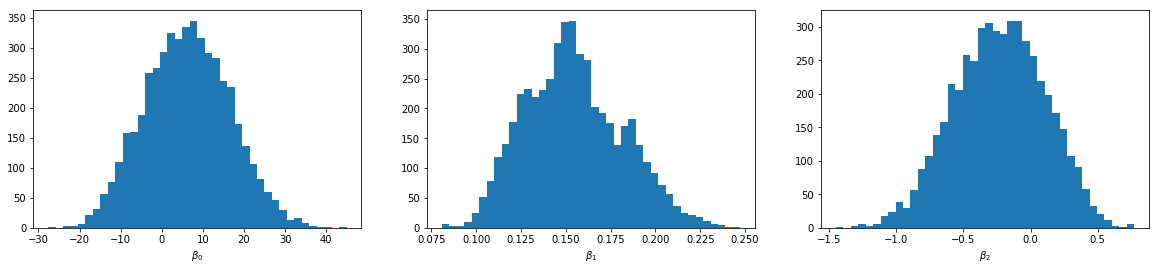

In [9]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')


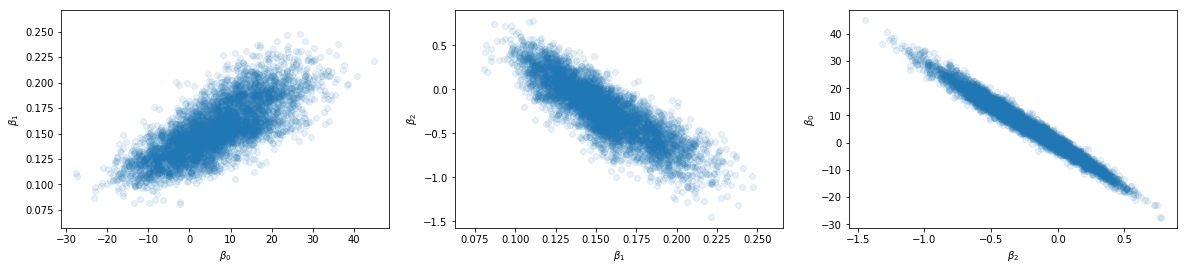

In [10]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

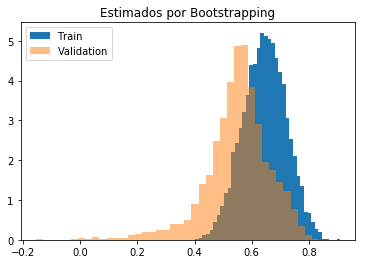

In [11]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Y de esta manera podemos estimar los valores medios de los parámetros

In [12]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.315047231051973 +/- 10.297312352873558
beta 1 0.15452225139328798 +/- 0.02727817665912039
beta 2 -0.23186052336732915 +/- 0.3367503005147814


Y entonces, que diferencias hay entre training, validation and test?

- training: datos para encontrar los parámetros del modelo, dado un método estadístico. En este caso los beta del modelo lineal (modelo) con mínimos cuadrados (método).
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. 
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.

# Ejercicio 7.1

Haga un ejercicio de bootstrap sobre el modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` para 
estimar los valores medios e incertidumbres. ¿Cuáles de los betas correspondientes son consistentes con cero?

In [9]:
X = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

In [11]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 
    
    

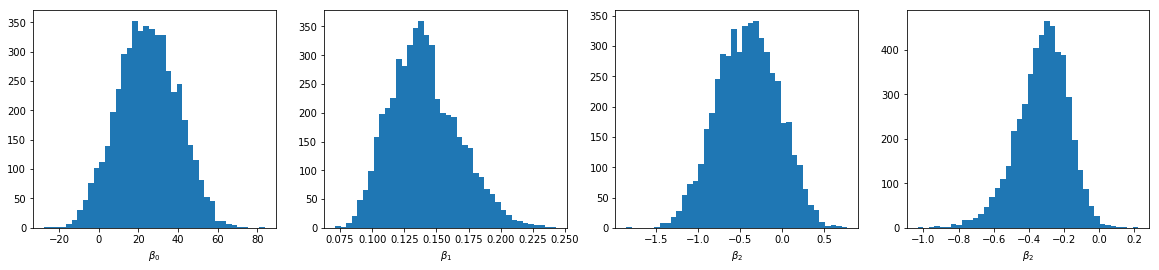

In [14]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_2$')


In [19]:
print('beta 0 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_0.mean(), beta_0.std(), beta_0.mean()-2*beta_0.std(),beta_0.mean()+2*beta_0.std() ))
print('beta 1 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_1.mean(), beta_1.std(), beta_1.mean()-2*beta_1.std(),beta_1.mean()+2*beta_1.std() ))
print('beta 2 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_2.mean(), beta_2.std(), beta_2.mean()-2*beta_2.std(),beta_2.mean()+2*beta_2.std() ))
print('beta 3 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_3.mean(), beta_3.std(), beta_3.mean()-2*beta_3.std(),beta_3.mean()+2*beta_3.std() ))

beta 0 24.71 +/- 15.08 range= [-5.46,54.87]
beta 1 0.14 +/- 0.03 range= [0.09,0.19]
beta 2 -0.41 +/- 0.36 range= [-1.14,0.32]
beta 3 -0.32 +/- 0.15 range= [-0.62,-0.03]


Los $\beta s$ consistentes con 0  si consideramos el rango viable como $\mu \pm 2\sigma$ son $\beta_0$ y $\beta_2$

# Ejercicio 7.2

Para el mismo modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` utilice MCMC para encontrar P(beta|datos).
¿Cómo se relacionan las distribuciones de los beta encontrados con bootstraping y con MCMC? 
¿Cómo se relacionan los valores medios y las incertidumbres?

In [91]:
def model(x,a,b,c,d):
    return a + b*x['Horsepower'] + c*x['Turn.circle'] + d*x['MPG.highway']

def loglikelihood(xobs, y_obs,a,b,c,d):
    ymodel = model(xobs,a,b,c,d)
    gamm = ymodel*np.exp(-ymodel/y_obs)/(y_obs**2)
    return np.log(np.sum(gamm))

def logprior(a,b,c,d):
    p = -np.inf
    if a < 30 and a >-30 and b >-1 and b<1 and c<5 and c>-5 and d>5 and d<-5:
        p = 0.0
    return p

In [92]:
x_obs = data[['Horsepower', 'Turn.circle','MPG.highway']]
y_obs = data['Price'].values

In [93]:
N = 50000
lista_b0 = [np.random.random()]
lista_b1 = [np.random.random()]
lista_b2 = [np.random.random()]
lista_b3 = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0]) + logprior(lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0])]

sigma_delta_b0 = 0.05
sigma_delta_b1 = 0.001
sigma_delta_b2 = 0.001
sigma_delta_b3 = 0.01

for i in range(1,N):
    propuesta_b0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b0)
    propuesta_b1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    propuesta_b2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b2)
    propuesta_b3  = lista_b3[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b3)

    logposterior_viejo = loglikelihood(x_obs, y_obs, lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0]) + logprior(lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, propuesta_b0, propuesta_b1, propuesta_b2, propuesta_b3) + logprior(propuesta_b0, propuesta_b1, propuesta_b2, propuesta_b3)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_b0.append(propuesta_b0)
        lista_b1.append(propuesta_b1)
        lista_b2.append(propuesta_b2)
        lista_b3.append(propuesta_b3)
        logposterior.append(logposterior_nuevo)
    else:
        lista_b0.append(lista_b0[i-1])
        lista_b1.append(lista_b1[i-1])
        lista_b2.append(lista_b2[i-1])
        lista_b3.append(lista_b3[i-1])
        logposterior.append(logposterior_viejo)
lista_b0 = np.array(lista_b0)
lista_b1 = np.array(lista_b1)
lista_b2 = np.array(lista_b2)
lista_b3 = np.array(lista_b3)
logposterior = np.array(logposterior)

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


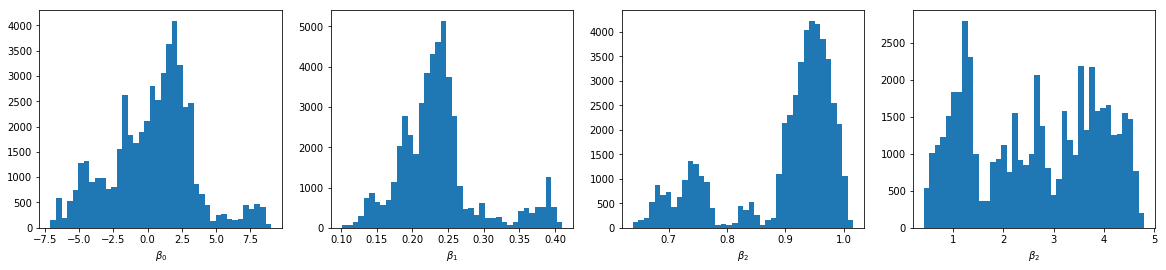

In [94]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(lista_b0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(lista_b1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(lista_b2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(lista_b3, bins=40)
_ = plt.xlabel(r'$\beta_2$')


In [95]:
print('beta 0 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_0.mean(), lista_b0.std(),  lista_b0.mean()- lista_b0.std(), lista_b0.mean()+lista_b0.std() ))
print('beta 1 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_1.mean(), lista_b1.std(),  lista_b1.mean()- lista_b1.std(), lista_b1.mean()+lista_b1.std() ))
print('beta 2 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_2.mean(), lista_b2.std(),  lista_b2.mean()- lista_b2.std(), lista_b2.mean()+lista_b2.std() ))
print('beta 3 {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}]'.format(beta_3.mean(), lista_b3.std(),  lista_b3.mean()- lista_b3.std(), lista_b3.mean()+lista_b3.std() ))

beta 0 24.71 +/- 3.05 range= [-2.66,3.43]
beta 1 0.14 +/- 0.06 range= [0.18,0.29]
beta 2 -0.41 +/- 0.10 range= [0.80,0.99]
beta 3 -0.32 +/- 1.26 range= [1.35,3.88]


Los $\beta s$ consistentes con 0  si consideramos el rango viable como $\mu \pm \sigma$ son $\beta_0$ y $\beta_2$, al igual que el ejercicio pasado. 

# Ejercicio 7.3

Construya un modelo lineal del precio como funcion de las siguientes variables.

```
k=['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
```

¿Cuáles son las beta correspondientes **no** son consistentes con ser cero? ¿Cuál es el modelo lineal que queda luego de descartar
estas variables sin importancia?

In [36]:
X = data[['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']]
Y = data['Price'].values.reshape(-1,1)

In [40]:
n_boot = 5000
bs = []
feats = ['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
for i in range(len(feats)+1):
    bs.append(np.ones(n_boot))
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    bs[0][i] = linear.intercept_[0]
    for k in range(len(feats)):
        bs[k+1][i] = linear.coef_[0][k]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 
    
    

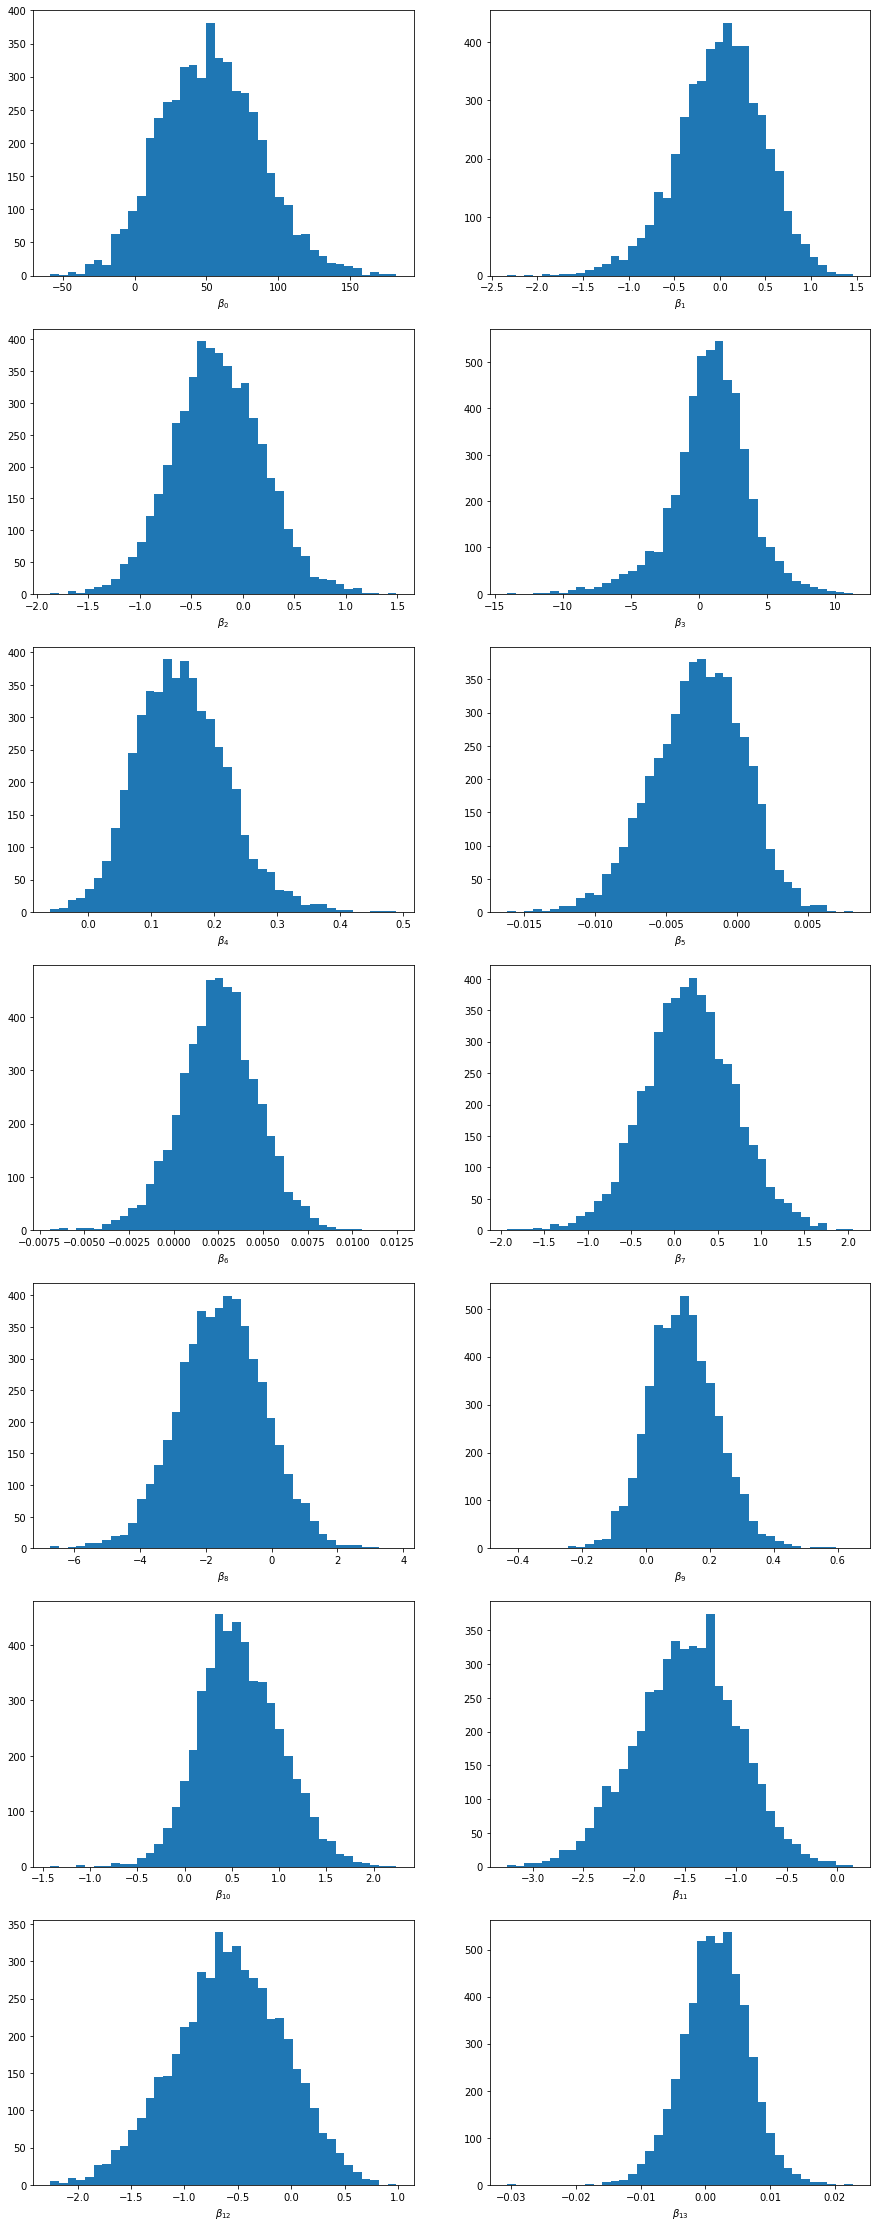

In [90]:
plt.figure(figsize=(15,40))

for k in range(len(feats)+1):
    plt.subplot((len(feats)+1)/2,2,k+1)
    _ = plt.hist(bs[k], bins=40)
    label = "\\beta_{" + "{}".format(k) + "}"
    _ = plt.xlabel(r'$'+label+'$')




In [57]:
for k in range(len(feats)+1):
    bmin= bs[k].mean()-bs[k].std()
    bmax=bs[k].mean()+bs[k].std()
    prom = bs[k].mean()
    print('beta {} {:.2f} +/- {:.2f} range= [{:.2f},{:.2f}] en0?: {}'.format(k,bs[k].mean(), bs[k].std(), bmin,bmax,0<bmax and 0>bmin))


beta 0 53.23 +/- 34.62 range= [18.61,87.85] en0?: False
beta 1 0.01 +/- 0.47 range= [-0.46,0.48] en0?: True
beta 2 -0.24 +/- 0.44 range= [-0.68,0.19] en0?: True
beta 3 0.86 +/- 2.82 range= [-1.96,3.68] en0?: True
beta 4 0.15 +/- 0.07 range= [0.08,0.22] en0?: False
beta 5 -0.00 +/- 0.00 range= [-0.01,0.00] en0?: True
beta 6 0.00 +/- 0.00 range= [0.00,0.00] en0?: False
beta 7 0.18 +/- 0.52 range= [-0.35,0.70] en0?: True
beta 8 -1.51 +/- 1.32 range= [-2.83,-0.19] en0?: False
beta 9 0.12 +/- 0.11 range= [0.01,0.22] en0?: False
beta 10 0.59 +/- 0.43 range= [0.16,1.02] en0?: False
beta 11 -1.48 +/- 0.50 range= [-1.98,-0.98] en0?: False
beta 12 -0.58 +/- 0.51 range= [-1.10,-0.07] en0?: False
beta 13 0.00 +/- 0.01 range= [-0.00,0.01] en0?: True


Las betas que **no** son consistentes con 0 considerando un un intervalo de $[\mu-\sigma,\mu+\sigma]$ son:

$$\beta_0,\beta_4,\beta_6,\beta_8,\beta_9,\beta_{10},\beta_{11},\beta_{12}$$


   
Por consiguiente, el modelo resultante es:

$$y = \beta_0 + \beta_4\cdot Horsepower+\beta_4 \cdot Rev.per.mile + \beta_8\cdot Passengers + \beta_9\cdot Length + \beta_{10} \cdot Wheelbase+\beta_{11}\cdot Width + \beta_{12}\cdot Turn.circle $$

In [ ]:
\